In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle
from collections import Counter
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_data(file_path):
    with open(file_path, 'rb') as f:
        data_pkl = pickle.load(f)
        return data_pkl

rna_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/liver_rna_seq_data.pkl"
data_rna_meta = read_data(rna_pickle_file_name)
data_rna_meta = data_rna_meta.fillna(0)
data_rna_meta = data_rna_meta[data_rna_meta['Sample ID'] != "A_10_19"]
print("rna sequencing data shape : %s" % str(data_rna_meta.shape))

liver_meta_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/diet/liver_metabolimics_all.pkl"
data_liver_meta = read_data(liver_meta_pickle_file_name)
data_liver_meta = data_liver_meta.fillna(0)
data_liver_meta.loc[(data_liver_meta['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_liver_meta.loc[(data_liver_meta['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("liver metabolomics shape : %s" % str(data_liver_meta.shape))

serum_meta_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/diet/metabolomics_serum.pkl"
data_serum_meta = read_data(serum_meta_pickle_file_name)
data_serum_meta = data_serum_meta.fillna(0)
data_serum_meta.loc[(data_serum_meta['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_serum_meta.loc[(data_serum_meta['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("serum metabolomics shape : %s" % str(data_serum_meta.shape))

urine_meta_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/diet/metabolomics_urine.pkl"
data_urine_meta = read_data(urine_meta_pickle_file_name)
data_urine_meta = data_urine_meta.fillna(0)
data_urine_meta.loc[(data_urine_meta['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_urine_meta.loc[(data_urine_meta['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("urine metabolomics shape : %s" % str(data_urine_meta.shape))

cecal_micro_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/cecal_microbiota_data.pkl"
data_cecal_micro = read_data(cecal_micro_pickle_file_name)
data_cecal_micro = data_cecal_micro.fillna(0)
data_cecal_micro.loc[(data_cecal_micro['Genotype'].str.find('WT') != -1),'Genotype']='WT'
data_cecal_micro.loc[(data_cecal_micro['Genotype'].str.find('FXR') != -1),'Genotype']='FXRKO'
print("cecal micro shape : %s" % str(data_cecal_micro.shape))

bile_acid_pickle_file_name = "/content/drive/MyDrive/Colab Notebooks/data/bile/bile_acid.pkl"
data_bile_acid = read_data(bile_acid_pickle_file_name)
data_bile_acid = data_bile_acid.fillna(0)
data_bile_acid = data_bile_acid.replace("No Peak",0)
print("bile acid shape : %s" % str(data_bile_acid.shape))

rna sequencing data shape : (47, 54313)
liver metabolomics shape : (72, 584)
serum metabolomics shape : (186, 59)
urine metabolomics shape : (247, 60)
cecal micro shape : (238, 379)
bile acid shape : (186, 16)


In [ ]:
def get_feature_list(file_path_name,sheet_name="Combined",column_value=0):
  features = pd.read_excel(file_path_name, sheet_name)
  features_list = features.iloc[:,column_value].tolist()
  return features_list

rna_combined_file_2 = "/content/drive/MyDrive/Colab Notebooks/data/age/2_ages/256_RNA seq_15 vs 5 _Uni.xlsx"
rna_combined_features_list_2 = get_feature_list(rna_combined_file_2,"Combined ")
print("the size of selected features list from rna metabolites for two ages: %s" % str(len(rna_combined_features_list_2)))

rna_combined_file_2_no_pseudo = "/content/drive/MyDrive/Colab Notebooks/data/age/2_ages/No pseudogene_256_RNA seq_15 vs 5 _Uni.xlsx"
rna_combined_features_list_2_no_pseudo = get_feature_list(rna_combined_file_2_no_pseudo,"without pseudogenes ")
print("the size of selected features list from rna metabolites for two ages without pseudogene: %s" % str(len(rna_combined_features_list_2_no_pseudo)))

liver_combined_file_2 = "/content/drive/MyDrive/Colab Notebooks/data/age/2_ages/96_Liver metabolites_15 vs 5_Uni.xlsx"
liver_combined_features_list_2 = get_feature_list(liver_combined_file_2)
print("the size of selected features list from liver metabolites for two ages: %s" % str(len(liver_combined_features_list_2)))

serum_combined_file_2 = "/content/drive/MyDrive/Colab Notebooks/data/age/2_ages/39_Serum metabolites_15 vs 5_Uni.xlsx"
serum_combined_features_list_2 = get_feature_list(serum_combined_file_2)
print("the size of selected features list from serum metabolites for two ages: %s" % str(len(serum_combined_features_list_2)))

urine_combined_file_2 = "/content/drive/MyDrive/Colab Notebooks/data/age/2_ages/42_Urine metabolites_15 vs 5_Uni.xlsx"
urine_combined_features_list_2 = get_feature_list(urine_combined_file_2)
print("the size of selected features list from urine metabolites for two ages: %s" % str(len(urine_combined_features_list_2)))

cecal_combined_file_2 = "/content/drive/MyDrive/Colab Notebooks/data/age/2_ages/33_Cecal microbiota_15 vs 5_Uni.xlsx"
cecal_combined_features_list_2 = get_feature_list(cecal_combined_file_2,"Sheet1",2)
print("the size of selected features list from cecal microbiota for two ages: %s" % str(len(cecal_combined_features_list_2)))

rna_combined_file_3 = "/content/drive/MyDrive/Colab Notebooks/data/age/3_ages/97_Age effect (3 ages, all genotypes)_Uni_RNA seq.xlsx"
rna_combined_features_list_3 = get_feature_list(rna_combined_file_3)
print("the size of selected features list from rna metabolites for three ages: %s" % str(len(rna_combined_features_list_3)))

rna_combined_file_3_no_pseudo = "/content/drive/MyDrive/Colab Notebooks/data/age/3_ages/No pseudogene_97_Age effect (3 ages, all genotypes)_Uni_RNA seq.xlsx"
rna_combined_features_list_3_no_pseudo = get_feature_list(rna_combined_file_3_no_pseudo,"No pseudogene")
print("the size of selected features list from rna metabolites for three ages without pseudo: %s" % str(len(rna_combined_features_list_3_no_pseudo)))


liver_combined_file_3 = "/content/drive/MyDrive/Colab Notebooks/data/age/3_ages/140_Age effect_liver metabolites (3 ages, all genotypes).xlsx"
liver_combined_features_list_3 = get_feature_list(liver_combined_file_3)
print("the size of selected features list from liver metabolites for three ages: %s" % str(len(liver_combined_features_list_3)))

serum_combined_file_3 = "/content/drive/MyDrive/Colab Notebooks/data/age/3_ages/50_Age effect_Serum metabolites (3 ages, all genotypes).xlsx"
serum_combined_features_list_3 = get_feature_list(serum_combined_file_3)
print("the size of selected features list from serum metabolites for three ages: %s" % str(len(serum_combined_features_list_3)))

urine_combined_file_3 = "/content/drive/MyDrive/Colab Notebooks/data/age/3_ages/50_Age effect_Urine metabolites (3 ages, all genotypes).xlsx"
urine_combined_features_list_3 = get_feature_list(urine_combined_file_3)
print("the size of selected features list from urine metabolites for three ages: %s" % str(len(urine_combined_features_list_3)))

cecal_combined_file_3 = "/content/drive/MyDrive/Colab Notebooks/data/age/3_ages/40_Cecal microbiota_3 ages_Uni.xlsx"
cecal_combined_features_list_3 = get_feature_list(cecal_combined_file_3,"Sheet1",3)
print("the size of selected features list from cecal microbiota for three ages: %s" % str(len(cecal_combined_features_list_3)))


the size of selected features list from rna metabolites for two ages: 256
the size of selected features list from rna metabolites for two ages without pseudogene: 212
the size of selected features list from liver metabolites for two ages: 96
the size of selected features list from serum metabolites for two ages: 39
the size of selected features list from urine metabolites for two ages: 42
the size of selected features list from cecal microbiota for two ages: 33
the size of selected features list from rna metabolites for three ages: 97
the size of selected features list from rna metabolites for three ages without pseudo: 82
the size of selected features list from liver metabolites for three ages: 140
the size of selected features list from serum metabolites for three ages: 50
the size of selected features list from urine metabolites for three ages: 50
the size of selected features list from cecal microbiota for three ages: 40


In [ ]:
bile_acid_combined_features_list =  data_bile_acid.columns.to_list()[4:]
print("the size of selected features list from bile acid: %s" % str(len(bile_acid_combined_features_list)))

the size of selected features list from bile acid: 12


In [ ]:
def get_data_x_y(data_ori,feature_list,type):

  genotype_str = "Genotype"
  age_str = "Age (months)" if "Age (months)" in data_ori.columns.tolist() else "Age"
  data_ori = data_ori.astype({age_str: int})
  if type == 2:
    data_ori_x = data_ori[((data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")) & ((data_ori[age_str] == 5) | (data_ori[age_str] == 15))][feature_list].reset_index(drop=True)
    data_ori_y = data_ori[((data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")) & ((data_ori[age_str] == 5) | (data_ori[age_str] == 15))][age_str].reset_index(drop=True)
  else:
    data_ori_x = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][feature_list].reset_index(drop=True)
    data_ori_y = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][age_str].reset_index(drop=True)
  return data_ori_x,data_ori_y

data_serum_meta["Age (months)"].replace({"05M": 5, "10M": 10,"15M":15}, inplace=True)
data_urine_meta["Age"].replace({"05M": 5, "10M": 10,"15M":15}, inplace=True)
X_rna_2,y_rna_2 = get_data_x_y(data_rna_meta,rna_combined_features_list_2,2)
X_rna_2_no_pseudo,y_rna_2_no_pseudo = get_data_x_y(data_rna_meta,rna_combined_features_list_2_no_pseudo,2)
X_rna_3,y_rna_3 = get_data_x_y(data_rna_meta,rna_combined_features_list_3,3)
X_rna_3_no_pseudo,y_rna_3_no_pseudo = get_data_x_y(data_rna_meta,rna_combined_features_list_3_no_pseudo,3)
X_liver_2,y_liver_2 = get_data_x_y(data_liver_meta,liver_combined_features_list_2,2)
X_liver_3,y_liver_3 = get_data_x_y(data_liver_meta,liver_combined_features_list_3,3)
X_serum_2,y_serum_2 = get_data_x_y(data_serum_meta,serum_combined_features_list_2,2)
X_serum_3,y_serum_3 = get_data_x_y(data_serum_meta,serum_combined_features_list_3,3)
X_urine_2,y_urine_2 = get_data_x_y(data_urine_meta,urine_combined_features_list_2,2)
X_urine_3,y_urine_3 = get_data_x_y(data_urine_meta,urine_combined_features_list_3,3)
X_cecal_2,y_cecal_2 = get_data_x_y(data_cecal_micro,cecal_combined_features_list_2,2)
X_cecal_3,y_cecal_3 = get_data_x_y(data_cecal_micro,cecal_combined_features_list_3,3)

In [ ]:
def get_data_x_y(data_ori,feature_list,type,sex_str):
  data_ori = data_ori[data_ori['Sex'] == sex_str]
  genotype_str = "Genotype"
  age_str = "Age (months)" if "Age (months)" in data_ori.columns.tolist() else "Age"
  data_ori = data_ori.astype({age_str: int})
  if type == 2:
    data_ori_x = data_ori[((data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")) & ((data_ori[age_str] == 5) | (data_ori[age_str] == 15))][feature_list].reset_index(drop=True)
    data_ori_y = data_ori[((data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")) & ((data_ori[age_str] == 5) | (data_ori[age_str] == 15))][age_str].reset_index(drop=True)
  else:
    data_ori_x = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][feature_list].reset_index(drop=True)
    data_ori_y = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][age_str].reset_index(drop=True)
  return data_ori_x,data_ori_y

data_serum_meta["Age (months)"].replace({"05M": 5, "10M": 10,"15M":15}, inplace=True)
data_urine_meta["Age"].replace({"05M": 5, "10M": 10,"15M":15}, inplace=True)
X_serum_2_male,y_serum_2_male = get_data_x_y(data_serum_meta,serum_combined_features_list_2,2,"M")
X_serum_3_male,y_serum_3_male = get_data_x_y(data_serum_meta,serum_combined_features_list_3,3,"M")
X_urine_2_male,y_urine_2_male = get_data_x_y(data_urine_meta,urine_combined_features_list_2,2,"M")
X_urine_3_male,y_urine_3_male = get_data_x_y(data_urine_meta,urine_combined_features_list_3,3,"M")
X_cecal_2_male,y_cecal_2_male = get_data_x_y(data_cecal_micro,cecal_combined_features_list_2,2,"Male")
X_cecal_3_male,y_cecal_3_male = get_data_x_y(data_cecal_micro,cecal_combined_features_list_3,3,"Male")

In [ ]:
def get_data_x_y(data_ori,feature_list,type):

  genotype_str = "Genotype"
  age_str = "Age (months)" if "Age (months)" in data_ori.columns.tolist() else "Age"
  data_ori = data_ori.astype({age_str: int})
  if type == 2:
    data_ori_x = data_ori[((data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")) & ((data_ori[age_str] == 5) | (data_ori[age_str] == 15))][feature_list].reset_index(drop=True)
    data_ori_y = data_ori[((data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")) & ((data_ori[age_str] == 5) | (data_ori[age_str] == 15))][age_str].reset_index(drop=True)
  else:
    data_ori_x = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][feature_list].reset_index(drop=True)
    data_ori_y = data_ori[(data_ori[genotype_str] == "WT") | (data_ori[genotype_str] == "FXRKO")][age_str].reset_index(drop=True)
  return data_ori_x,data_ori_y
X_bile_2,y_bile_2 = get_data_x_y(data_bile_acid,bile_acid_combined_features_list,2)
X_bile_3,y_bile_3 = get_data_x_y(data_bile_acid,bile_acid_combined_features_list,3)

In [ ]:
def all_features_importance(clf,data_x,data_y,abs_flag):

  scaler = StandardScaler()
  scaler.fit(data_x)
  data_x_scaler = scaler.transform(data_x)

  clf.fit(data_x_scaler,data_y)
  imp = abs(clf.coef_[0]) if abs_flag else clf.coef_[0]
  all_features_list = data_x.columns.tolist()
  print(all_features_list)
  imp, names = zip(*sorted(list(zip(imp, all_features_list))))
  columns_name = list(names)
  columns_name.reverse()
  print(imp)
  print("columns_name : %s" % str(columns_name))
  print("columns_name shape: %s" % str(len(columns_name)))
  return columns_name
clf=SVC(kernel='linear')
rna_linear_features_important_2 = all_features_importance(clf,X_rna_2,y_rna_2,True)
rna_linear_features_important_2_no_pseudo = all_features_importance(clf,X_rna_2_no_pseudo,y_rna_2_no_pseudo,True)
liver_linear_features_important_2 = all_features_importance(clf,X_liver_2,y_liver_2,True)
serum_linear_features_important_2 = all_features_importance(clf,X_serum_2,y_serum_2,True)
urine_linear_features_important_2 = all_features_importance(clf,X_urine_2,y_urine_2,True)
cecal_linear_features_important_2 = all_features_importance(clf,X_cecal_2,y_cecal_2,True)
serum_male_linear_features_important_2 = all_features_importance(clf,X_serum_2_male,y_serum_2_male,True)
urine_male_linear_features_important_2 = all_features_importance(clf,X_urine_2_male,y_urine_2_male,True)
cecal_male_linear_features_important_2 = all_features_importance(clf,X_cecal_2_male,y_cecal_2_male,True)

rna_linear_features_important_3 = all_features_importance(clf,X_rna_3,y_rna_3,True)
rna_linear_features_important_3_no_pseudo = all_features_importance(clf,X_rna_3_no_pseudo,y_rna_3_no_pseudo,True)
liver_linear_features_important_3 = all_features_importance(clf,X_liver_3,y_liver_3,True)
serum_linear_features_important_3 = all_features_importance(clf,X_serum_3,y_serum_3,True)
urine_linear_features_important_3 = all_features_importance(clf,X_urine_3,y_urine_3,True)
cecal_linear_features_important_3 = all_features_importance(clf,X_cecal_3,y_cecal_3,True)
serum_male_linear_features_important_3 = all_features_importance(clf,X_serum_3_male,y_serum_3_male,True)
urine_male_linear_features_important_3 = all_features_importance(clf,X_urine_3_male,y_urine_3_male,True)
cecal_male_linear_features_important_3 = all_features_importance(clf,X_cecal_3_male,y_cecal_3_male,True)

['Eif4a-ps4', 'Cyp2b9', 'Sprr1a', 'Cidea', 'Cidec', 'B430212C06Rik', 'Cyp4a14', 'Gm3776', 'Ttc39aos1', 'Igkv4-55', 'Cyp2a22', 'Gprc5b', 'Osbpl3', 'Gsta1', 'Ly6d', 'Gm10804', 'Slc22a27', 'Mmp12', 'Igkv5-39', 'Rad51b', 'Vldlr', 'Slc22a26', 'Ephb2', 'Cd36', 'Themis', 'Sema3b', 'Cyp2a4', 'Raet1e', 'Sytl5', 'Adgrg2', 'Cyp46a1', 'Vnn1', 'Slc22a29', 'Impa2', 'Gm28438', 'Acot3', 'Gm19619', 'Gm32468', 'Abcd2', 'Mab21l3', 'Gal3st1', 'Cyp2c39', 'Rps27rt', 'Slc16a5', 'Ubd', 'Hr', 'Plin4', 'Serpina7', 'Myc', 'Pde4d', 'Gpat3', 'Il1rn', 'Lgals1', 'Gm52950', 'Cyp2c38', 'Serpinb1a', 'Plat', 'Sema5b', 'Ifi27l2b', 'Kif20a', 'Epb41l1', 'Mrgprb11-ps', 'Tmprss4', 'Top2a', 'Cyp17a1', 'Zfp677', '2010003K11Rik', 'Esm1', 'Samd4', 'Cenpe', 'Capn6', 'Morc4', 'Pparg', 'Npnt', 'Eda2r', 'Rdh16', 'Cysltr1', 'Itga4', 'Ect2', 'Soat1', 'Pclo', 'Gpr35', 'Lrrc39', 'Fam83a', 'Pltp', 'Abcb1a', 'H2-Q1', 'Klf6', 'Htra3', 'Tmem45b', 'Scd1', 'Prelid2', 'Cyp3a11', 'Wt1', 'Mfsd2a', 'Gabra3', 'Ermp1', 'Psd4', 'Mapt', 'Dzip1l', 'Ga

In [ ]:
def all_features_importance(clf,data_x,data_y,abs_flag):

  scaler = StandardScaler()
  scaler.fit(data_x)
  data_x_scaler = scaler.transform(data_x)

  clf.fit(data_x_scaler,data_y)
  imp = abs(clf.coef_[0]) if abs_flag else clf.coef_[0]
  all_features_list = data_x.columns.tolist()
  print(all_features_list)
  imp, names = zip(*sorted(list(zip(imp, all_features_list))))
  columns_name = list(names)
  columns_name.reverse()
  print(imp)
  print("columns_name : %s" % str(columns_name))
  print("columns_name shape: %s" % str(len(columns_name)))
  return columns_name
clf=SVC(kernel='linear')
bile_linear_features_important_2 = all_features_importance(clf,X_bile_2,y_bile_2,True)
bile_linear_features_important_3 = all_features_importance(clf,X_bile_3,y_bile_3,True)

['a-MCA', 'b-MCA', 'CA', 'CDCA', 'DCA', 'HDCA', 'LCA', 'T-ab-MCA', 'TCA', 'TCDCA', 'TLCA', 'UDCA']
(2.948707902188097e-05, 0.013552044637642674, 0.03268814436554812, 0.03446686815598757, 0.0405529928690857, 0.05033536169645997, 0.05546192962060226, 0.058493412248601606, 0.11918145044890122, 0.2568197005590577, 0.32254280165724314, 1.5018780907799496)
columns_name : ['LCA', 'UDCA', 'b-MCA', 'CA', 'T-ab-MCA', 'HDCA', 'DCA', 'CDCA', 'TCA', 'TLCA', 'a-MCA', 'TCDCA']
columns_name shape: 12
['a-MCA', 'b-MCA', 'CA', 'CDCA', 'DCA', 'HDCA', 'LCA', 'T-ab-MCA', 'TCA', 'TCDCA', 'TLCA', 'UDCA']
(3.947272254289924e-05, 0.008363881156001618, 0.013894633019822189, 0.09722545566480378, 0.12106746522180512, 0.13484590444223388, 0.592622180271186, 0.6862921365143264, 0.8060377212949279, 0.9331468596432362, 1.2157377316531779, 2.2873861593060614)
columns_name : ['LCA', 'TLCA', 'UDCA', 'DCA', 'b-MCA', 'CDCA', 'TCA', 'HDCA', 'CA', 'a-MCA', 'T-ab-MCA', 'TCDCA']
columns_name shape: 12


In [ ]:
def top_k_features_predict(clf,data_x,data_y,feature_list,top,fold):

  columns_name = feature_list[:top]
  # print("columns_name : %s" % str(columns_name))
  data_x_scaler_selected = data_x[columns_name]
  scaler = StandardScaler()
  scaler.fit(data_x_scaler_selected)
  data_x_scaler_selected = scaler.transform(data_x_scaler_selected)
  # print(data_x_scaler_selected.shape)
  svc_scores = cross_val_score(clf, data_x_scaler_selected, data_y.values.ravel(), cv=fold,n_jobs=1)
  # print(svc_scores)
  confidence_result = (196.0 * np.array(svc_scores).std()) / np.sqrt(len(svc_scores))
  # print("SVC: %0.1f%% accuracy with .95 confidence interval of %0.1f%%" % (svc_scores.mean()*100, confidence_result))
  mean_score = round(svc_scores.mean()*100,1)
  round_cr = round(confidence_result,1)
  # print(round_cr)
  return mean_score,round_cr

In [ ]:
def get_accuracy_list(clf,data_x,data_y,feature_list,fold):
  feature_len = len(feature_list)
  score_list = []
  confidence_score = []
  for i in range(1,feature_len):
    mean_score,round_cr = top_k_features_predict(clf,data_x,data_y,feature_list,i,fold)
    score_list.append(mean_score)
    confidence_score.append(round_cr)
  print(score_list)
  print(confidence_score)
  return score_list,confidence_score

In [ ]:
rna_age_2_accuracy_list,rna_age_2_ci = get_accuracy_list(clf,X_rna_2,y_rna_2,rna_linear_features_important_2,16)
rna_age_2_no_pseudo_accuracy_list,rna_age_2_no_pseudo_ci = get_accuracy_list(clf,X_rna_2_no_pseudo,y_rna_2_no_pseudo,rna_linear_features_important_2_no_pseudo,16)
liver_age_2_accuracy_list,liver_age_2_ci = get_accuracy_list(clf,X_liver_2,y_liver_2,liver_linear_features_important_2,20)
serum_age_2_accuracy_list,serum_age_2_ci = get_accuracy_list(clf,X_serum_2,y_serum_2,serum_linear_features_important_2,20)
urine_age_2_accuracy_list,urine_age_2_ci = get_accuracy_list(clf,X_urine_2,y_urine_2,urine_linear_features_important_2,20)
cecal_age_2_accuracy_list,cecal_age_2_ci = get_accuracy_list(clf,X_cecal_2,y_cecal_2,cecal_linear_features_important_2,20)
rna_age_3_accuracy_list,rna_age_3_ci = get_accuracy_list(clf,X_rna_3,y_rna_3,rna_linear_features_important_3,10)
rna_age_3_no_pseudo_accuracy_list,rna_age_3_no_pseudo_ci = get_accuracy_list(clf,X_rna_3_no_pseudo,y_rna_3_no_pseudo,rna_linear_features_important_3_no_pseudo,10)
liver_age_3_accuracy_list,liver_age_3_ci = get_accuracy_list(clf,X_liver_3,y_liver_3,liver_linear_features_important_3,20)
serum_age_3_accuracy_list,serum_age_3_ci = get_accuracy_list(clf,X_serum_3,y_serum_3,serum_linear_features_important_3,20)
urine_age_3_accuracy_list,urine_age_3_ci = get_accuracy_list(clf,X_urine_3,y_urine_3,urine_linear_features_important_3,20)
cecal_age_3_accuracy_list,cecal_age_3_ci = get_accuracy_list(clf,X_cecal_3,y_cecal_3,cecal_linear_features_important_3,20)

[59.4, 93.8, 100.0, 96.9, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 1

In [ ]:
serum_male_age_2_accuracy_list,serum_male_age_2_ci = get_accuracy_list(clf,X_serum_2_male,y_serum_2_male,serum_male_linear_features_important_2,20)
urine_male_age_2_accuracy_list,urine_male_age_2_ci = get_accuracy_list(clf,X_urine_2_male,y_urine_2_male,urine_male_linear_features_important_2,20)
cecal_male_age_2_accuracy_list,cecal_male_age_2_ci = get_accuracy_list(clf,X_cecal_2_male,y_cecal_2_male,cecal_male_linear_features_important_2,20)
serum_male_age_3_accuracy_list,serum_male_age_3_ci = get_accuracy_list(clf,X_serum_3_male,y_serum_3_male,serum_male_linear_features_important_3,20)
urine_male_age_3_accuracy_list,urine_male_age_3_ci = get_accuracy_list(clf,X_urine_3_male,y_urine_3_male,urine_male_linear_features_important_3,20)
cecal_male_age_3_accuracy_list,cecal_male_age_3_ci = get_accuracy_list(clf,X_cecal_3_male,y_cecal_3_male,cecal_male_linear_features_important_3,20)

[95.0, 97.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[4.4, 3.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[76.8, 72.8, 90.0, 97.0, 98.0, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[7.5, 6.9, 7.1, 3.1, 2.6, 2.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[69.2, 69.2, 75.5, 75.5, 74.5, 76.5, 76.5, 74.5, 76.5, 76

In [ ]:
bile_age_2_accuracy_list,bile_age_2_ci = get_accuracy_list(clf,X_bile_2,y_bile_2,bile_linear_features_important_2,20)
bile_age_3_accuracy_list,bile_age_3_ci = get_accuracy_list(clf,X_bile_3,y_bile_3,bile_linear_features_important_3,20)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[92.0, 94.1, 94.1, 93.5, 94.6, 94.6, 94.1, 96.7, 97.8, 97.8, 97.8]
[3.8, 3.1, 2.8, 3.5, 3.2, 3.6, 3.6, 3.5, 1.9, 1.9, 1.9]


In [ ]:
def substractTwoList(list1,list2):
  subtracted = list()
  for item1, item2 in zip(list1, list2):
    item = item1 - item2
    subtracted.append(item)
  # print(subtracted)
  return subtracted

In [ ]:
def addTwoList(list1,list2):
  added = list()
  for item1, item2 in zip(list1, list2):
    item = item1 + item2
    added.append(item)
  # print(added)
  return added

In [ ]:
def draw_figure(y,ci,feature_list,legend_name):
  y_sub_ci = substractTwoList(y,ci)
  y_add_ci = addTwoList(y,ci)
  max_val = max(y)
  idx_max = int(y.index(max_val)+1)
  print("the least number of features to get the maximum accuracy %s%%: %s" % (str(max_val),str(idx_max)))
  print("feature list: %s" % str(feature_list[:idx_max]))
  t = np.arange(1, len(y)+1, 1)
  fig, ax = plt.subplots()
  ax.plot(t, y)
  ax.fill_between(t, y_sub_ci, y_add_ci, color='b', alpha=.1)
  # Get the y limits
  ymin, ymax = min(y), max(y)

  # Set the y limits making the maximum 5% greater
  ax.set_ylim(ymin-10, 100)
  ax.set(xlabel='The number of features', ylabel='Accuracy')
  ax.set_title(legend_name)
  ax.grid()
  plt.show()

the least number of features to get the maximum accuracy 100.0%: 14
feature list: ['Zbtb16', 'Rps27rt', 'Naip2', 'Cyp46a1', 'Mmd2', 'AA792892', 'A4gnt', 'Cdh19', 'Pclo', 'Zfp677', 'Cyp3a11', 'Hsf2bp', 'Kcnj16', 'Mfsd2a']


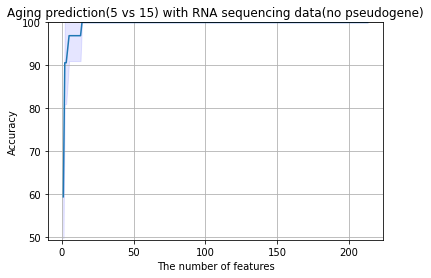

In [ ]:
draw_figure(rna_age_2_no_pseudo_accuracy_list,rna_age_2_no_pseudo_ci,rna_linear_features_important_2_no_pseudo,"Aging prediction(5 vs 15) with RNA sequencing data(no pseudogene)")

the least number of features to get the maximum accuracy 100.0%: 30
feature list: ['Hbb-bt', 'S100a9', 'Lyve1', 'Cdh19', '9930111J21Rik1', 'Sult1e1', 'Slc2a3', 'Clec4e', 'Clmp', 'Fam25c', 'Igha', 'Hr', 'Dhrs9', 'Folh1', 'D130043K22Rik', 'Mup10', 'Mcm3ap', 'Gstp1', 'St14', 'Iglc1', 'Rnf125', 'Gm5617', 'Zc2hc1a', 'Igkv5-39', 'mt-Co3', 'Igkv4-55', 'Fkbp11', 'Fgf21', 'Atp5k', 'Acacb']


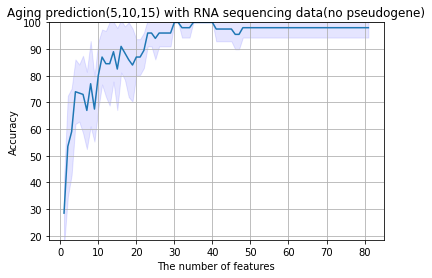

In [ ]:
draw_figure(rna_age_3_no_pseudo_accuracy_list,rna_age_3_no_pseudo_ci,rna_linear_features_important_3_no_pseudo,"Aging prediction(5,10,15) with RNA sequencing data(no pseudogene)")

the least number of features to get the maximum accuracy 100.0%: 3
feature list: ['Zbtb16', 'Eif4a-ps4', 'Gm12715']


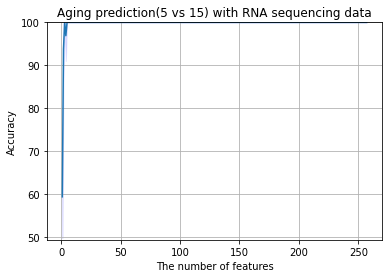

the least number of features to get the maximum accuracy 100.0%: 3
feature list: ['Zbtb16', 'Eif4a-ps4', 'Gm12715']


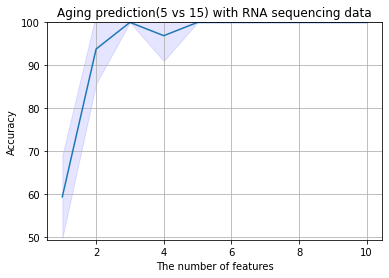

In [ ]:
draw_figure(rna_age_2_accuracy_list,rna_age_2_ci,rna_linear_features_important_2,"Aging prediction(5 vs 15) with RNA sequencing data")
draw_figure(rna_age_2_accuracy_list[:10],rna_age_2_ci[:10],rna_linear_features_important_2,"Aging prediction(5 vs 15) with RNA sequencing data")

the least number of features to get the maximum accuracy 98.0%: 20
feature list: ['Hbb-bt', 'S100a9', 'Clmp', 'Lyve1', '9930111J21Rik1', 'Clec4e', 'Cdh19', 'Slc2a3', 'Gm37240', 'Gm28438', 'Iglc1', 'Dhrs9', 'Gm12481', 'Gstp1', 'D130043K22Rik', 'Fam25c', 'D330041H03Rik', 'Gm28040', 'Sult1e1', 'Rnf125']


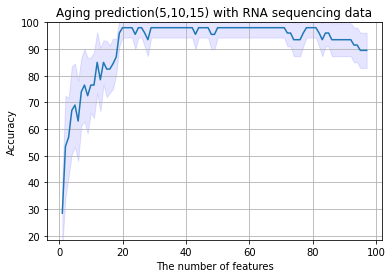

In [ ]:
draw_figure(rna_age_3_accuracy_list,rna_age_3_ci,rna_linear_features_important_3,"Aging prediction(5,10,15) with RNA sequencing data")
# draw_figure(rna_age_3_accuracy_list[:10],"Aging prediction(5,10,15) with RNA sequencing data")

the least number of features to get the maximum accuracy 100.0%: 20
feature list: ['succinate semialdehyde', 'xylitol', 'valine', 'glyceric acid', 'aspartic acid', 'melibiose', 'ethanolamine', 'glutaric acid', 'ascorbic acid', '2-aminobutyric acid', '2-monoolein', '3-(1-pyrazolyl)-L-alanine', 'glycolic acid', 'beta-glutamic acid', '1,5-anhydroglucitol', 'uridine', 'squalene', 'serine', 'palmitoleic acid', 'lactic acid']


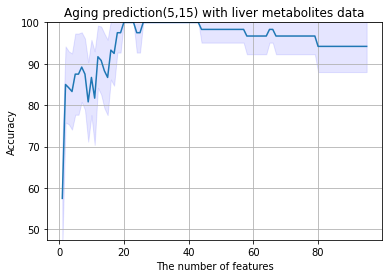

the least number of features to get the maximum accuracy 94.6%: 40
feature list: ['arachidonic acid', 'N-acetylmannosamine', 'valine', 'succinate semialdehyde', 'ethanol phosphate', 'palmitoleic acid', 'ornithine', '1-monopalmitin', 'glycerol-alpha-phosphate', 'isomaltose', 'lysine', '4-hydroxybutyric acid', 'stearic acid', 'uracil', 'xanthosine', 'isoleucine', 'glucoheptulose', 'asparagine', 'N-acetylglutamate', 'glutathione', 'xylitol', 'glyceric acid', 'oxoproline', 'glutamine', 'myristic acid', 'glutaric acid', 'oleic acid', 'ascorbic acid', '2-ketobutyric acid', 'sucrose', 'ribulose-5-phosphate', 'UDP-glucuronic acid', 'squalene', 'lactic acid', 'methionine', 'galactitol', 'xanthine', 'melibiose', 'creatine', 'uridine']


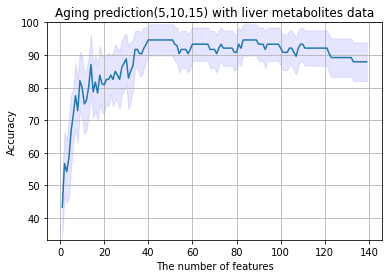

In [ ]:
draw_figure(liver_age_2_accuracy_list,liver_age_2_ci,liver_linear_features_important_2,"Aging prediction(5,15) with liver metabolites data")
draw_figure(liver_age_3_accuracy_list,liver_age_3_ci,liver_linear_features_important_3,"Aging prediction(5,10,15) with liver metabolites data")

the least number of features to get the maximum accuracy 100.0%: 8
feature list: ['Acetone', '1.3_Dihydroxyacetone', 'Acetate', 'Glycerol', 'Pyruvate', 'Glycolate', 'Ornithine', 'Betaine']


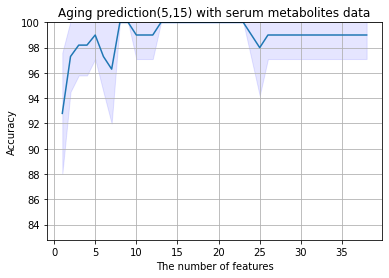

the least number of features to get the maximum accuracy 98.9%: 34
feature list: ['Glycerol', '1.3_Dihydroxyacetone', 'Choline', 'Histidine', '2_Hydroxyisobutyrate', 'Ornithine', 'Isoleucine', 'Leucine', 'Glycine', 'Proline', '3_Hydroxybutyrate', 'Serine', 'Malate', 'Urea', '2_Oxoisocaproate', 'Carnitine', 'Alanine', 'Acetate', 'Citrate', 'Valine', 'Formate', 'Ethanol', 'Glycolate', 'Betaine', '3_Hydroxyisobutyrate', 'Trimethylamine', 'Asparagine', 'Trimethylamine_N_oxide', 'Glucose', 'O_Acetylcarnitine', 'Pyruvate', 'Succinate', 'Acetone', 'Arginine']


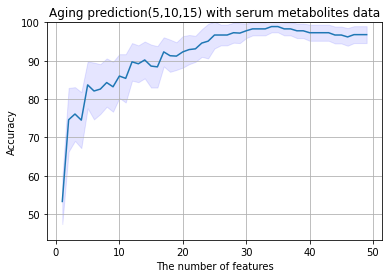

In [ ]:
draw_figure(serum_age_2_accuracy_list,serum_age_2_ci,serum_linear_features_important_2,"Aging prediction(5,15) with serum metabolites data")
draw_figure(serum_age_3_accuracy_list,serum_age_3_ci,serum_linear_features_important_3,"Aging prediction(5,10,15) with serum metabolites data")

the least number of features to get the maximum accuracy 100.0%: 3
feature list: ['Pyruvate', '1.3_Dihydroxyacetone', 'Acetone']


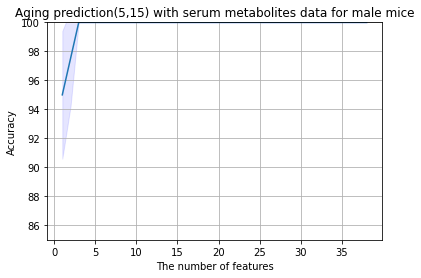

the least number of features to get the maximum accuracy 98.5%: 22
feature list: ['Glycerol', '1.3_Dihydroxyacetone', 'Histidine', 'Choline', 'Ornithine', 'Glycolate', 'Malate', 'Carnitine', 'Proline', 'Betaine', 'Isoleucine', 'Glycine', '2_Hydroxyisobutyrate', '3_Hydroxybutyrate', 'Leucine', 'Citrate', 'Ethanol', 'Asparagine', 'Alanine', 'Serine', 'Trimethylamine', 'O_Acetylcarnitine']


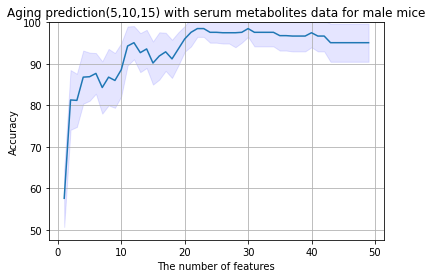

In [ ]:
draw_figure(serum_male_age_2_accuracy_list,serum_male_age_2_ci,serum_male_linear_features_important_2,"Aging prediction(5,15) with serum metabolites data for male mice")
draw_figure(serum_male_age_3_accuracy_list,serum_male_age_3_ci,serum_male_linear_features_important_3,"Aging prediction(5,10,15) with serum metabolites data for male mice")

the least number of features to get the maximum accuracy 100.0%: 7
feature list: ['Methylamine', 'N.N_Dimethylglycine', 'Betaine', '2_Hydroxyisobutyrate', 'sn_Glycero_3_phosphocholine', '3_Indoxylsulfate', 'Ascorbate']


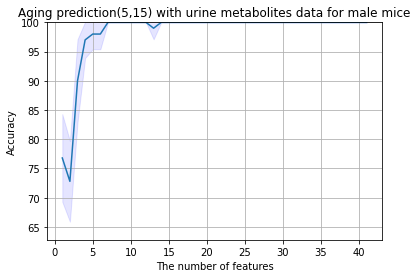

the least number of features to get the maximum accuracy 87.8%: 29
feature list: ['Methylamine', 'sn_Glycero_3_phosphocholine', 'N.N_Dimethylglycine', 'Niacinamide', 'Fucose', 'Creatinine', 'trans_Aconitate', 'Trimethylamine N_oxide', 'Arabinose', 'Formate', 'N_Phenylacetylglycine', 'Carnitine', 'Leucine', 'Tartrate', 'Taurine', '3_Methyl_2_oxovalerate', 'Allantoin', 'N_Carbamoyl___alanine', 'Ascorbate', 'cis_Aconitate', '1_Methylnicotinamide', '3_Indoxylsulfate', 'Betaine', '5.6_Dihydrouracil', 'Guanidoacetate', 'Citrate', 'Trimethylamine', 'Acetamide', 'Uracil']


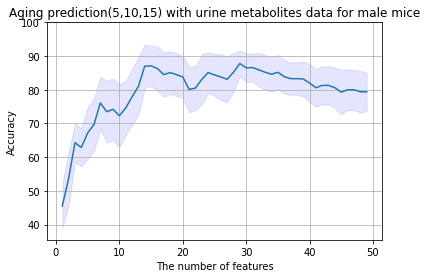

In [ ]:
draw_figure(urine_male_age_2_accuracy_list,urine_male_age_2_ci,urine_male_linear_features_important_2,"Aging prediction(5,15) with urine metabolites data for male mice")
draw_figure(urine_male_age_3_accuracy_list,urine_male_age_3_ci,urine_male_linear_features_important_3,"Aging prediction(5,10,15) with urine metabolites data for male mice")

the least number of features to get the maximum accuracy 100.0%: 12
feature list: ['N.N_Dimethylglycine', 'Methylamine', 'Creatinine', 'Betaine', 'sn_Glycero_3_phosphocholine', 'Pseudouridine', '2_Hydroxyisobutyrate', '3_Indoxylsulfate', '1_Methylnicotinamide', 'Acetate', 'Leucine', 'Carnitine']


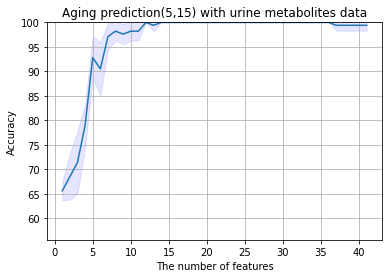

the least number of features to get the maximum accuracy 88.3%: 19
feature list: ['N.N_Dimethylglycine', 'Methylamine', 'Betaine', 'Carnitine', 'Tartrate', 'sn_Glycero_3_phosphocholine', 'trans_Aconitate', 'N_Phenylacetylglycine', 'Acetate', 'Pseudouridine', 'Creatinine', 'Arabinose', '2_Oxoisocaproate', 'Niacinamide', 'Uracil', 'cis_Aconitate', 'Guanidoacetate', '3_Methyl_2_oxovalerate', 'Ascorbate']


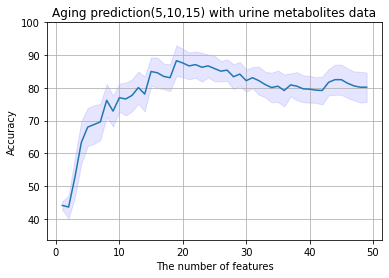

In [ ]:
draw_figure(urine_age_2_accuracy_list,urine_age_2_ci,urine_linear_features_important_2,"Aging prediction(5,15) with urine metabolites data")
draw_figure(urine_age_3_accuracy_list,urine_age_3_ci,urine_linear_features_important_3,"Aging prediction(5,10,15) with urine metabolites data")

the least number of features to get the maximum accuracy 79.3%: 32
feature list: ['k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__', 'k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae', 'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Oscillospira', 'k__Bacteria;p__Firmicutes;c__Clostri

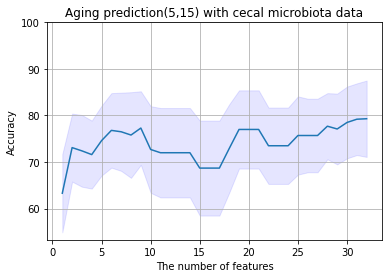

the least number of features to get the maximum accuracy 61.5%: 36
feature list: ['k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__p-75-a5', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae];g__Butyricimonas', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae', 'k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia', 'k__Bacteria;p__Bacteroidetes', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__;g__', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bactero

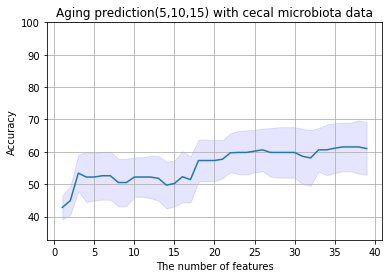

In [ ]:
draw_figure(cecal_age_2_accuracy_list,cecal_age_2_ci,cecal_linear_features_important_2,"Aging prediction(5,15) with cecal microbiota data")
draw_figure(cecal_age_3_accuracy_list,cecal_age_3_ci,cecal_linear_features_important_3,"Aging prediction(5,10,15) with cecal microbiota data")

the least number of features to get the maximum accuracy 76.8%: 11
feature list: ['k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae', 'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae', 'k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__;g__', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__', 'k__Bacteria;p__Firmicutes;c__

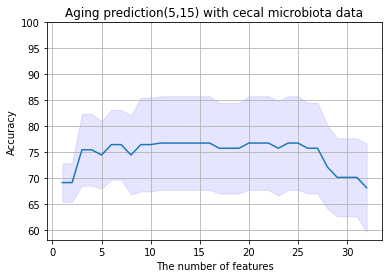

the least number of features to get the maximum accuracy 64.2%: 25
feature list: ['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Anaerotruncus', 'k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae;g__p-75-a5', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Odoribacteraceae];g__Butyricimonas', 'k__Bacteria;p__Firmicutes', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__;g__', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Oscillospira', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia', 'k__Bacteria;p__Bacteroidetes', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides', 'k__Bacteria;p__Bacteroidetes;c_

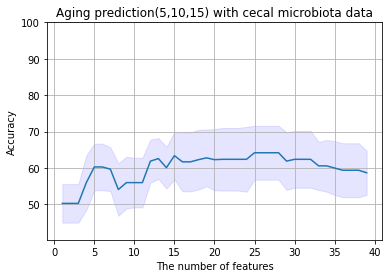

In [ ]:
draw_figure(cecal_male_age_2_accuracy_list,cecal_male_age_2_ci,cecal_male_linear_features_important_2,"Aging prediction(5,15) with cecal microbiota data")
draw_figure(cecal_male_age_3_accuracy_list,cecal_male_age_3_ci,cecal_male_linear_features_important_3,"Aging prediction(5,10,15) with cecal microbiota data")

the least number of features to get the maximum accuracy 100.0%: 1
feature list: ['LCA']


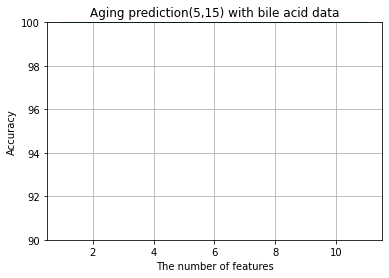

the least number of features to get the maximum accuracy 97.8%: 9
feature list: ['LCA', 'TLCA', 'UDCA', 'DCA', 'b-MCA', 'CDCA', 'TCA', 'HDCA', 'CA']


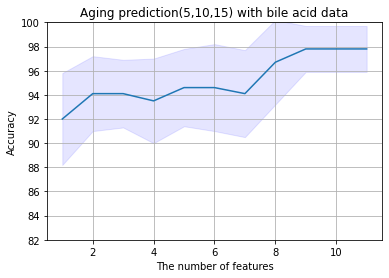

In [ ]:
draw_figure(bile_age_2_accuracy_list,bile_age_2_ci,bile_linear_features_important_2,"Aging prediction(5,15) with bile acid data")
draw_figure(bile_age_3_accuracy_list,bile_age_3_ci,bile_linear_features_important_3,"Aging prediction(5,10,15) with bile acid data")